## Install PiML and dependencies

In [1]:
!pip install piml

## Setup


In [2]:
# Initializing PiML object
from piml import Experiment
exp = Experiment()

In [3]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Load data

In [4]:
# Loading data
#exp.data_loader()
# or using pandas to read datafile
exp.data_loader("SimuCredit")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Mortgage,Balance,Amount Past Due,Credit Inquiry,Open Trade,Delinquency,Utilization,Gender,Race,Approved
0,196153.90,2115.19,0.00,0.0,0.0,0.0,0.759069,1.0,0.0,1.0
1,149717.49,2713.77,1460.57,1.0,1.0,1.0,0.402820,1.0,0.0,1.0
2,292626.34,2209.01,0.00,0.0,0.0,0.0,0.684272,1.0,1.0,1.0
3,264812.52,21.68,0.00,0.0,0.0,0.0,0.037982,0.0,0.0,0.0
4,236374.39,1421.49,1290.85,0.0,0.0,2.0,0.231110,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19995,236123.54,3572.34,0.00,0.0,0.0,0.0,0.896326,1.0,1.0,0.0
19996,374572.72,3560.24,0.00,0.0,0.0,0.0,0.648893,1.0,1.0,0.0
19997,279238.55,101.75,0.00,0.0,0.0,0.0,0.068079,0.0,1.0,0.0
19998,149678.27,439.46,214.36,1.0,0.0,2.0,0.311219,0.0,0.0,1.0


## Data summary and exploratory analysis

#### Exclude protected features

In [5]:
exp.data_summary(feature_exclude=['Gender', 'Race'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(20000, 10)')

In [6]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [40]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Prepare data for supervised learning

In [7]:
exp.data_prepare(target='Approved', task_type='classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,"[Race, Gender]"
1,Target variable,Approved
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.2
6,Random state,0
7,Train test energy distance,0.000089


## Model training

#### train four internal piml models and an external XGB model

In [8]:
# Select EBM, XGB2, GAMI-Net, and ReLU-DNN
# For XGB2, click on the configure button; type "Mortgage", in monotonic increasing; and "Utilization", in monotonic decreasing.
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [9]:
xgbtuned = XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.3, random_state=0)
exp.model_train(model=xgbtuned, name='xgb_ext')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [25]:
for mod in ['GAMI-Net', 'EBM', 'ReLU-DNN', 'XGB2','xgb_ext']:
    print(mod)
    exp.model_diagnose(model=mod, show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

GAMI-Net


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6953,0.7583,0.7778,0.6717,0.7209
Test,0.6867,0.7560,0.7650,0.6698,0.7143
Gap,-0.0085,-0.0023,-0.0127,-0.0019,-0.0066


EBM


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6995,0.7670,0.7749,0.6775,0.7229
Test,0.6933,0.7555,0.7684,0.6763,0.7194
Gap,-0.0062,-0.0114,-0.0065,-0.0012,-0.0035


ReLU-DNN


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6953,0.7601,0.7839,0.6700,0.7225
Test,0.6885,0.7591,0.7738,0.6692,0.7177
Gap,-0.0068,-0.0010,-0.0101,-0.0008,-0.0048


XGB2


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7035,0.7732,0.7637,0.6859,0.7227
Test,0.6827,0.7540,0.7440,0.6715,0.7059
Gap,-0.0208,-0.0192,-0.0197,-0.0144,-0.0168


xgb_ext


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9169,0.9792,0.9568,0.8878,0.9210
Test,0.6570,0.7122,0.7015,0.6536,0.6767
Gap,-0.2599,-0.2670,-0.2552,-0.2342,-0.2443


#### According to AUC metric (threshold independent ) 

##### GAMI-Net > FFNN > EBM > XGB2 > xgb_ext

## Model Explainability

feature imp

GAMI-NET : Dq > uti> mort >bal> inq

EBM : uti > dq > mort > amount > bal

ReLU : dq > uti > mort > bal > inq

XGB2 : amount > uti > mort > bal > dq 

xgb_ext : uti > bal > mort > amount > dq



In [29]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [11]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

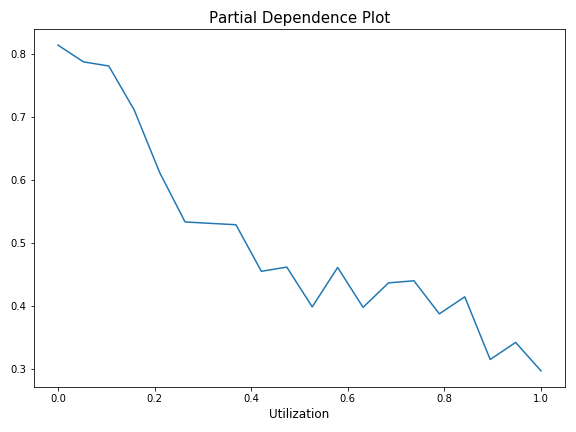

In [12]:
exp.model_explain(model='xgb_ext', show='pdp',uni_feature='Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

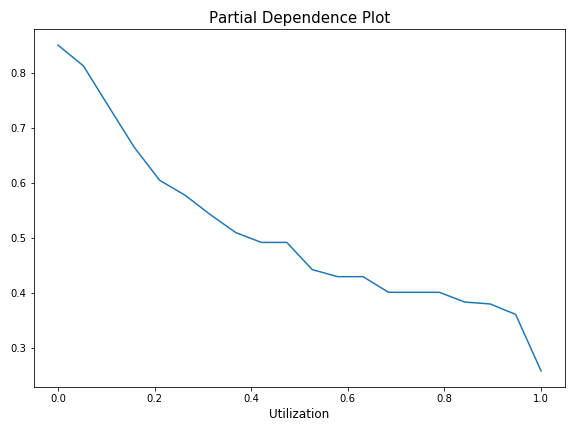

In [30]:
exp.model_explain(model='XGB2', show='pdp',uni_feature='Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

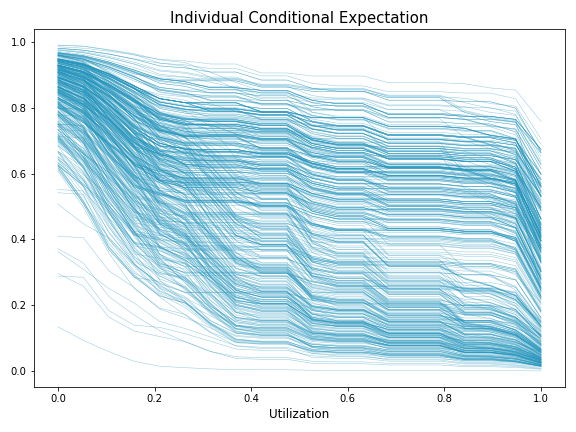

In [31]:
exp.model_explain(model='XGB2', show='ice',uni_feature='Utilization')

In [32]:
exp.model_interpret()
## uti indeed has strong interaction with amount past due for xgb2

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [16]:
exp.model_interpret() 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

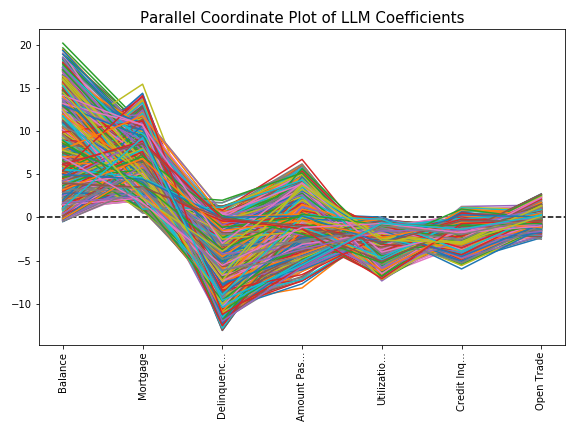

In [33]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

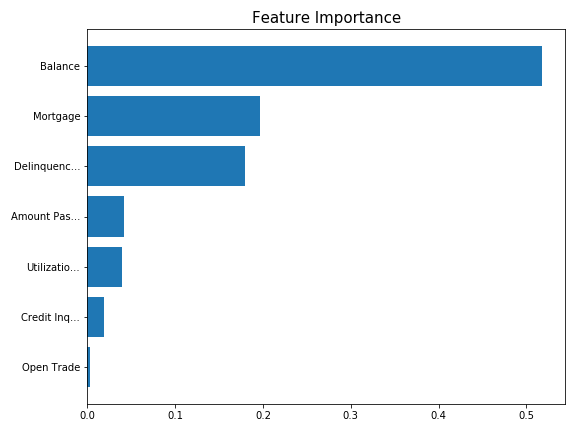

In [34]:
exp.model_interpret(model='ReLU-DNN', show='global_fi') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

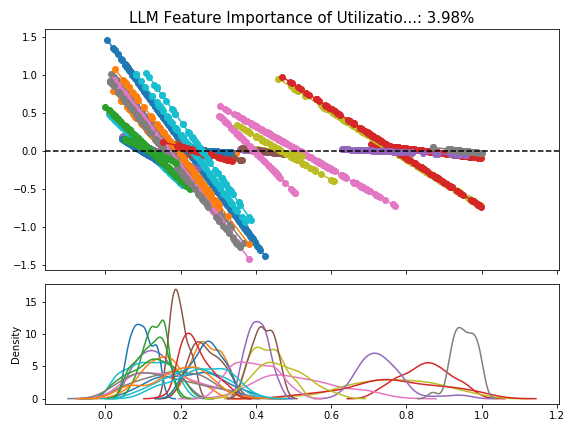

In [35]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='Utilization') 

In [36]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,573.0,0.3595,0.4803,0.6640,0.6577
1,385.0,0.5688,0.4959,0.6031,0.7053
2,288.0,0.6424,0.4801,0.5826,0.7137
3,286.0,0.5350,0.4997,0.4724,0.7218
4,279.0,0.7849,0.4116,0.5689,0.7068
...,...,...,...,...,...
3155,1.0,1.0000,NaN,NaN,0.6963
3156,1.0,1.0000,NaN,NaN,0.5051
3157,1.0,0.0000,NaN,NaN,0.6943
3158,1.0,0.0000,NaN,NaN,0.6942


In [37]:
# Model Diagnostics
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [22]:
# Model Comparison
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [23]:
exp.model_fairness()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>